In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


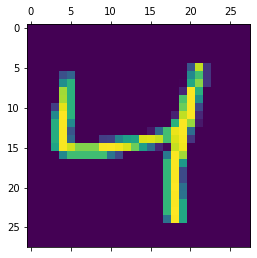

In [4]:
plt.matshow(x_train[2])

In [5]:
y_train[2]

4

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train_flatten= x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [10]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [11]:
#building a simple neural network without hidden layers
model=keras.Sequential([
                        keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
     optimizer='adam',
     loss='sparse_categorical_crossentropy',
     metrics=['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4740 - accuracy: 0.8755
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9206


In [12]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.9239


[0.27274343371391296, 0.9239000082015991]

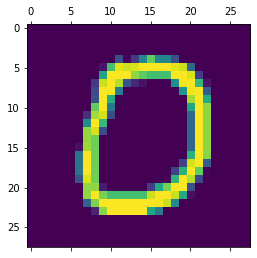

In [13]:
plt.matshow(x_test[10])

In [14]:
y_pred= model.predict(x_test_flatten)
y_pred[0]

array([5.2662373e-02, 2.7267456e-06, 7.4841946e-02, 9.4312793e-01,
       4.6336949e-03, 1.0305223e-01, 1.3038509e-05, 9.9972111e-01,
       1.2526673e-01, 7.0957553e-01], dtype=float32)

In [15]:
np.argmax(y_pred[10])

0

In [16]:
y_pred_labels=  [ np.argmax(i) for i in y_pred]

In [17]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

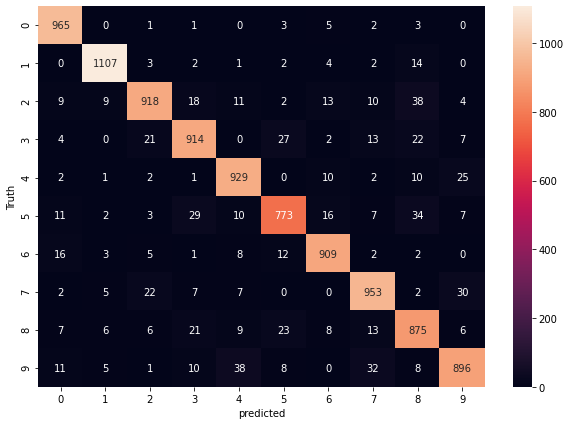

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [29]:
#building a neural network with single hidden layer
model=keras.Sequential([
                        keras.layers.Dense(100, input_shape=(784,),activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
     optimizer='adam',
     loss='sparse_categorical_crossentropy',
     metrics=['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1244 - accuracy: 0.9632
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0850 - accuracy: 0.9750
